# Video Game Sales with Ratings

**Dataset:** [Rush Kirubi, Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

| Description | Statistic |
| ----------- | --------- |
| Total year range of data | 1980 - 2020 |
| Total number of games | 11,563 |
| Number of games after cleaning | 6,825 |
| Packages | `numpy`, `pandas`, `matplotlib`, `seaborn` |

**Columns**:
* `Name`
* `Platform`
* `Year_of_Release`
* `Genre`
* `Publisher`
* `NA_Sales`
* `EU_Sales`
* `JP_Sales`
* `Other_Sales`
* `Global_Sales`
* `Critic_Score`
* `Critic_Count`
* `User_Score`
* `User_Count`
* `Developer`
* `Rating`

### Imports

In [49]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Global variables
year_range = "2010-2016"
figure_size = (10, 6)

Helper function from [matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html):

In [51]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

## Data preparation

### Reading data

In [52]:
data = pd.read_csv('../datasets/sales_rush_kirubi.csv')
print(data.count())
data.head()

Name               16717
Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16665
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Global_Sales       16719
Critic_Score        8137
Critic_Count        8137
User_Score         10015
User_Count          7590
Developer          10096
Rating              9950
dtype: int64


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Year distribution analysis

In [53]:
data_count_by_year = data.groupby('Year_of_Release')['Name'].count()
data_count_by_year.describe()

count      39.000000
mean      421.743590
std       450.540361
min         1.000000
25%        19.000000
50%       289.000000
75%       707.500000
max      1427.000000
Name: Name, dtype: float64

/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_33403/2779501934.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


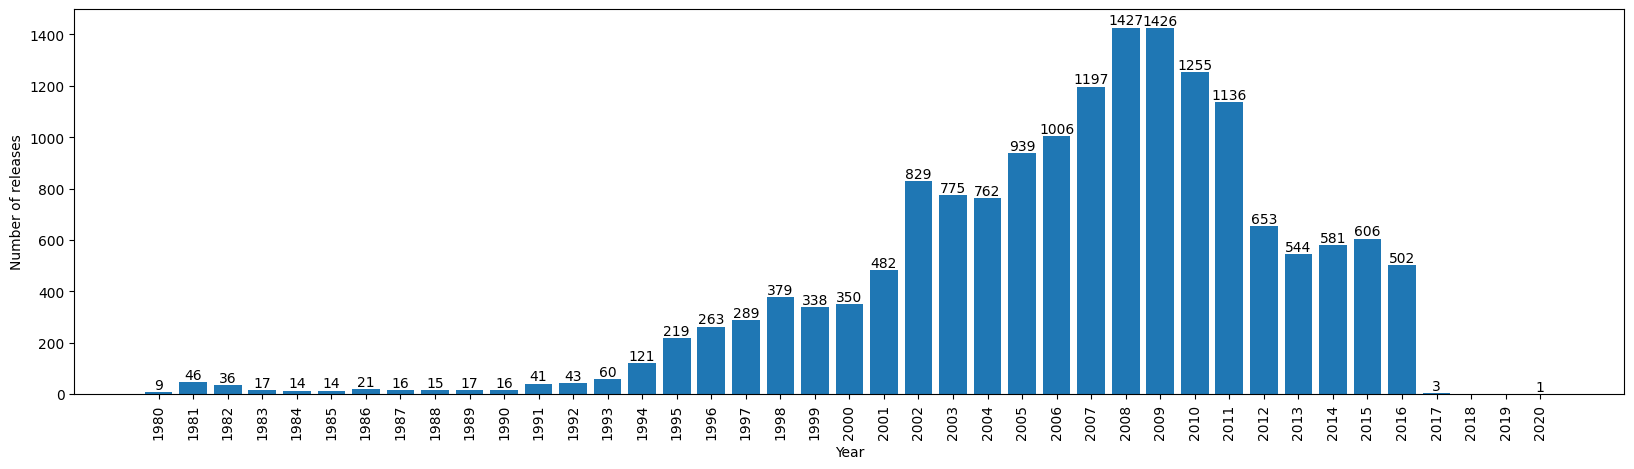

In [54]:
x_labels = np.arange(1980, 2021)
fig, ax = plt.subplots(figsize=(20, 5))
bar_container = ax.bar(data_count_by_year.index, data_count_by_year)
ax.set(xlabel='Year', ylabel='Number of releases')
ax.set_xticks(x_labels, x_labels, rotation=90)
ax.bar_label(bar_container)

fig.show()

### Cleaning data

In [55]:
data_clean = data[data['Critic_Count'].notna()]
data_clean = data_clean[data_clean['User_Score'].notna()]
data_clean = data_clean[data_clean['User_Score'] != 'tbd']
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Rating'].notna()]
data_clean = data_clean[data_clean['Publisher'].notna()]
data_clean = data_clean[data_clean['Year_of_Release'].notna()]
data_clean[data_clean.columns[-4]] = data_clean['User_Score'].astype(float)
data_clean.count()

Name               6825
Platform           6825
Year_of_Release    6825
Genre              6825
Publisher          6825
NA_Sales           6825
EU_Sales           6825
JP_Sales           6825
Other_Sales        6825
Global_Sales       6825
Critic_Score       6825
Critic_Count       6825
User_Score         6825
User_Count         6825
Developer          6825
Rating             6825
dtype: int64

In [91]:
# Scopes to the period of 2010 to 2016
data_2010_2016 = data_clean[data_clean['Year_of_Release'] >= 2010]
data_2010_2016.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,2012.440805,0.393280,0.295073,0.058479,0.094871,0.841788,71.216659,33.200281,6.756855,359.293870
std,1.973936,0.849488,0.628733,0.202921,0.207301,1.645649,13.402210,22.752004,1.446639,871.933007
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2011.000000,0.050000,0.030000,0.000000,0.010000,0.130000,64.000000,14.000000,6.000000,26.000000
50%,2012.000000,0.140000,0.100000,0.000000,0.030000,0.320000,74.000000,28.000000,7.100000,79.000000
75%,2014.000000,0.390000,0.290000,0.040000,0.090000,0.870000,81.000000,48.000000,7.800000,289.000000
max,2016.000000,15.000000,9.090000,4.390000,3.960000,21.810000,97.000000,113.000000,9.300000,10665.000000


## Genre analysis

### Count by genre

In [57]:
data_count_by_genre = data_2010_2016.groupby('Genre')['Name'].count()
data_count_by_genre = data_count_by_genre[data_count_by_genre.index != 'Misc']
data_count_by_genre = data_count_by_genre.sort_values(ascending=False)
data_count_by_genre

Genre
Action          661
Shooter         291
Role-Playing    250
Sports          237
Racing          135
Fighting        120
Platform         94
Adventure        77
Simulation       68
Strategy         60
Puzzle           20
Name: Name, dtype: int64

/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_33403/2151327174.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_count_by_genre.index, rotation=75)
/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_33403/2151327174.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


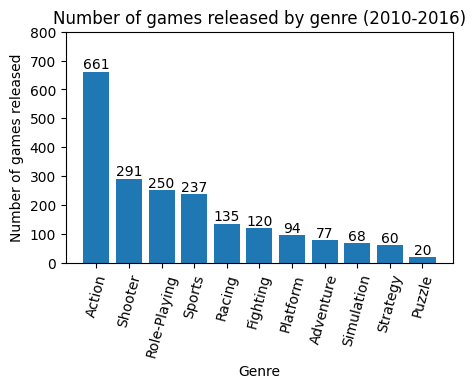

In [58]:
fig, ax = plt.subplots(figsize=[s * 0.5 for s in figure_size])
bar_container = ax.bar(data_count_by_genre.index, data_count_by_genre)
ax.set(xlabel='Genre', ylabel='Number of games released', ylim=(0,800))
ax.set(title=f'Number of games released by genre ({year_range})')
ax.set_xticklabels(data_count_by_genre.index, rotation=75)
ax.bar_label(bar_container)
fig.show()

### Sales by genre

Chosen genres:
* Shooter
* Role-playing
* Sport

In [59]:
chosen_genres = ('Shooter', 'Role-Playing', 'Sports')

In [60]:
data_2010_2016.groupby('Genre')['Global_Sales'].describe().loc[[g for g in chosen_genres]]

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Shooter,291.0,1.403918,2.443469,0.01,0.20,0.560,1.46,14.73
Role-Playing,250.0,0.696400,1.156710,0.01,0.12,0.265,0.77,8.79
Sports,237.0,0.956456,1.268947,0.01,0.22,0.510,1.09,8.57


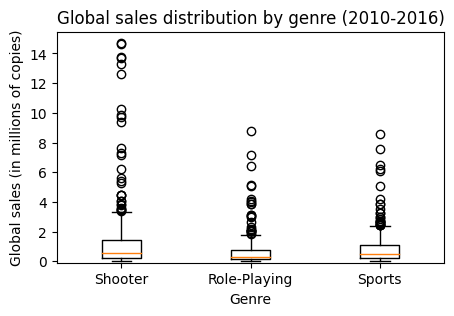

In [61]:
plt.figure(figsize=[s * 0.5 for s in figure_size])
plt.boxplot([data_2010_2016[data_2010_2016['Genre'] == genre]['Global_Sales'] for genre in chosen_genres],
            labels=chosen_genres)
plt.xlabel('Genre')
plt.ylabel('Global sales (in millions of copies)')
plt.ylim(bottom=-0.1)
plt.title(f'Global sales distribution by genre ({year_range})')
plt.show()

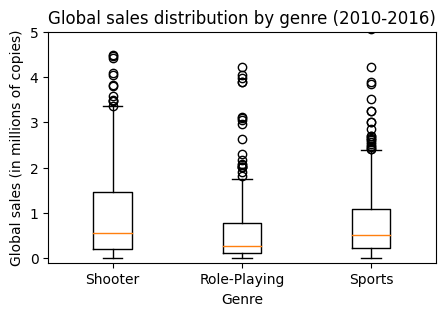

In [62]:
# scoped chart
plt.figure(figsize=[s * 0.5 for s in figure_size])
plt.boxplot([data_2010_2016[data_2010_2016['Genre'] == genre]['Global_Sales'] for genre in chosen_genres],
            labels=chosen_genres)
plt.xlabel('Genre')
plt.ylabel('Global sales (in millions of copies)')
plt.ylim(bottom=-0.1, top=5)
plt.title(f'Global sales distribution by genre ({year_range})')
plt.show()

## Region analysis

### Sales by region

> Funnelled by "Shooter" genre

In [63]:
region_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_labels = ['North America', 'EU', 'Japan', 'Others']

In [64]:
data_shooter = data_2010_2016[data_2010_2016['Genre'] == 'Shooter']
data_shooter.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,2012.463918,0.700378,0.498660,0.040893,0.163952,1.403918,72.319588,42.515464,6.491409,749.446735
std,1.956749,1.362178,0.834844,0.124402,0.290366,2.443469,13.637079,24.239941,1.544455,1190.270439
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.010000,32.000000,4.000000,1.200000,4.000000
25%,2011.000000,0.085000,0.080000,0.000000,0.020000,0.200000,64.500000,23.000000,5.800000,101.000000
50%,2012.000000,0.240000,0.210000,0.000000,0.060000,0.560000,75.000000,39.000000,6.700000,334.000000
75%,2014.000000,0.715000,0.515000,0.035000,0.160000,1.460000,82.000000,59.500000,7.700000,893.000000
max,2016.000000,9.700000,5.730000,1.460000,2.420000,14.730000,95.000000,113.000000,8.900000,8713.000000


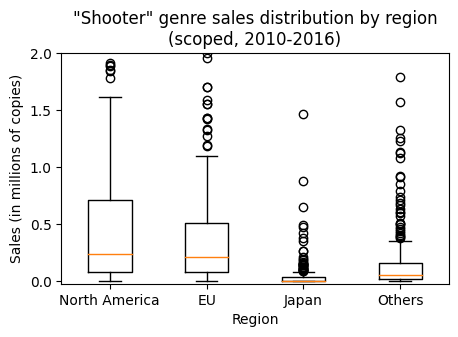

In [65]:
plt.figure(figsize=[s * 0.5 for s in figure_size])
plt.boxplot([data_shooter[region] for region in region_sales],
            labels=region_labels)
plt.xlabel('Region')
plt.ylabel('Sales (in millions of copies)')
plt.ylim(bottom=-0.02, top=2)
plt.title(f'"Shooter" genre sales distribution by region\n(scoped, {year_range})')
plt.show()

### Share of global sales by region

In [66]:
data_shooter_sales_total_by_region = data_shooter.iloc[:, 5:9].sum(axis=0)
data_shooter_sales_total_by_region

NA_Sales       203.81
EU_Sales       145.11
JP_Sales        11.90
Other_Sales     47.71
dtype: float64

In [67]:
def label_format(labels, sales):
    """
    Formats labels for the sections in the pie chart
    labels : data labels
    sales : sales in millions of copies
    """
    return [f'{label}\n({"{:.2f}".format(sales)} million copies)' for label, sales in zip(labels, sales)]

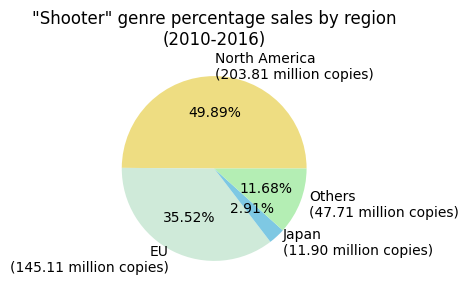

In [68]:
plt.figure(figsize=[s * 0.5 for s in figure_size])
plt.pie(data_shooter_sales_total_by_region,
        labels=label_format(['North America', 'EU', 'Japan', 'Others'], data_shooter_sales_total_by_region),
        colors=['#eedd82', '#cfead9', '#7EC8E3', '#b4eeb4'],
        autopct='%.2f%%')
plt.title(f'"Shooter" genre percentage sales by region\n({year_range})')
plt.show()

### Sales of "Shooter" genre in NA region

In [69]:
# Constructs regional sales proportion features
data_sales_prop_by_year = data_shooter.iloc[:, [2, 5, 6, 7, 8, 9]]
data_sales_prop_by_year.insert(data_sales_prop_by_year.columns.size, 'NA_Sales_Prop',
                               data_sales_prop_by_year['NA_Sales'] / data_sales_prop_by_year['Global_Sales'] * 100)
data_sales_prop_by_year.insert(data_sales_prop_by_year.columns.size, 'EU_Sales_Prop',
                               data_sales_prop_by_year['EU_Sales'] / data_sales_prop_by_year['Global_Sales'] * 100)
data_sales_prop_by_year.insert(data_sales_prop_by_year.columns.size, 'JP_Sales_Prop',
                               data_sales_prop_by_year['JP_Sales'] / data_sales_prop_by_year['Global_Sales'] * 100)
data_sales_prop_by_year.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Prop,EU_Sales_Prop,JP_Sales_Prop
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,2012.463918,0.700378,0.498660,0.040893,0.163952,1.403918,46.494644,38.892059,2.999942
std,1.956749,1.362178,0.834844,0.124402,0.290366,2.443469,20.412823,18.799418,8.218123
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,2011.000000,0.085000,0.080000,0.000000,0.020000,0.200000,35.239651,28.937724,0.000000
50%,2012.000000,0.240000,0.210000,0.000000,0.060000,0.560000,45.833333,37.500000,0.000000
75%,2014.000000,0.715000,0.515000,0.035000,0.160000,1.460000,59.539300,46.671701,2.847011
max,2016.000000,9.700000,5.730000,1.460000,2.420000,14.730000,100.000000,100.000000,77.142857


In [92]:
data_sales_prop_by_year_na = data_sales_prop_by_year[['Year_of_Release', 'NA_Sales_Prop', 'Global_Sales']]
data_sales_prop_by_year_na.describe()

,Year_of_Release,NA_Sales_Prop,Global_Sales
count,291.000000,291.000000,291.000000
mean,2012.463918,46.494644,1.403918
std,1.956749,20.412823,2.443469
min,2010.000000,0.000000,0.010000
25%,2011.000000,35.239651,0.200000
50%,2012.000000,45.833333,0.560000
75%,2014.000000,59.539300,1.460000
max,2016.000000,100.000000,14.730000


/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_33403/2666581221.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


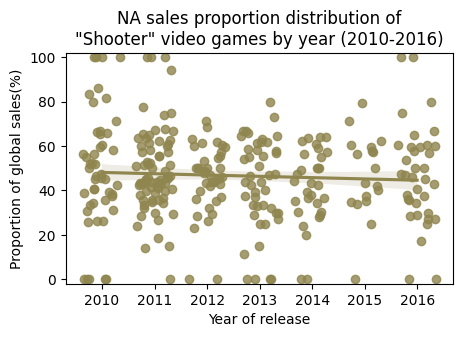

In [71]:
fig, ax = plt.subplots(figsize=[s * 0.5 for s in figure_size])
sns.regplot(x='Year_of_Release', y='NA_Sales_Prop', data=data_sales_prop_by_year_na,
           robust=True, x_jitter=0.36, ax=ax, color='#8f854e')
ax.set(xlabel='Year of release', ylabel='Proportion of global sales(%)', ylim=(-2, 102))
ax.set_title(f'NA sales proportion distribution of\n"Shooter" video games by year ({year_range})')
fig.show()

### Sales of "Shooter" genre in EU region

In [93]:
data_sales_prop_by_year_eu = data_sales_prop_by_year[['Year_of_Release', 'EU_Sales_Prop', 'Global_Sales']]
data_sales_prop_by_year_eu.describe()

,Year_of_Release,EU_Sales_Prop,Global_Sales
count,291.000000,291.000000,291.000000
mean,2012.463918,38.892059,1.403918
std,1.956749,18.799418,2.443469
min,2010.000000,0.000000,0.010000
25%,2011.000000,28.937724,0.200000
50%,2012.000000,37.500000,0.560000
75%,2014.000000,46.671701,1.460000
max,2016.000000,100.000000,14.730000


/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_33403/3962730429.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


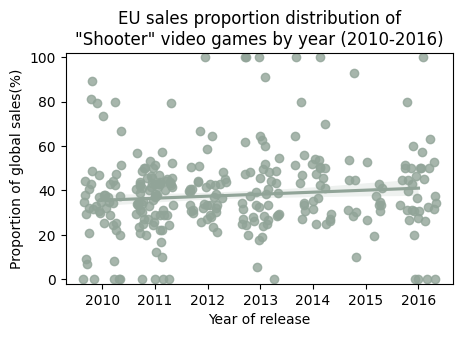

In [73]:
fig, ax = plt.subplots(figsize=[s * 0.5 for s in figure_size])
sns.regplot(x='Year_of_Release', y='EU_Sales_Prop', data=data_sales_prop_by_year_eu,
           robust=True, x_jitter=0.36, ax=ax, color='#91a498')
ax.set(xlabel='Year of release', ylabel='Proportion of global sales(%)', ylim=(-2, 102))
ax.set_title(f'EU sales proportion distribution of\n"Shooter" video games by year ({year_range})')
fig.show()

### Sales of "Shooter" genre in JP region

In [94]:
data_sales_prop_by_year_jp = data_sales_prop_by_year[['Year_of_Release', 'JP_Sales_Prop', 'Global_Sales']]
data_sales_prop_by_year_jp.describe()

,Year_of_Release,JP_Sales_Prop,Global_Sales
count,291.000000,291.000000,291.000000
mean,2012.463918,2.999942,1.403918
std,1.956749,8.218123,2.443469
min,2010.000000,0.000000,0.010000
25%,2011.000000,0.000000,0.200000
50%,2012.000000,0.000000,0.560000
75%,2014.000000,2.847011,1.460000
max,2016.000000,77.142857,14.730000


/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_33403/3673934514.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


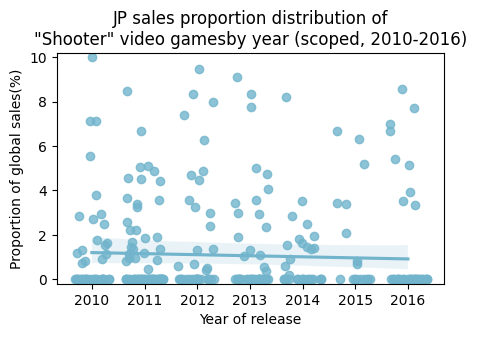

In [75]:
fig, ax = plt.subplots(figsize=[s * 0.5 for s in figure_size])
sns.regplot(x='Year_of_Release', y='JP_Sales_Prop', data=data_sales_prop_by_year_jp,
           robust=True, x_jitter=0.36, ax=ax, color='#71b4cc')
ax.set(xlabel='Year of release', ylabel='Proportion of global sales(%)', ylim=(-0.2, 10.2))
ax.set_title(f'JP sales proportion distribution of\n"Shooter" video gamesby year (scoped, {year_range})')
fig.show()

## Platform analysis

### EU sales by platform

> Scoped to 2010-2016

In [76]:
# Collapses platforms with least sales
data_platform_collapsed = data_2010_2016.copy(deep=True)
data_platform_collapsed.loc[data_2010_2016['Platform'] == 'PS2', 'Platform'] = 'Others'
data_platform_collapsed.loc[data_2010_2016['Platform'] == 'PSP', 'Platform'] = 'Others'
data_platform_collapsed.loc[data_2010_2016['Platform'] == 'PSV', 'Platform'] = 'Others'
data_platform_collapsed.loc[data_2010_2016['Platform'] == 'DS', 'Platform'] = 'Others'
data_eu_sales_by_platform = data_platform_collapsed.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)
data_eu_sales_by_platform

Platform
PS3       170.78
X360      137.57
PS4       111.78
PC         57.75
XOne       42.02
Wii        36.65
3DS        33.33
WiiU       20.42
Others     20.27
Name: EU_Sales, dtype: float64

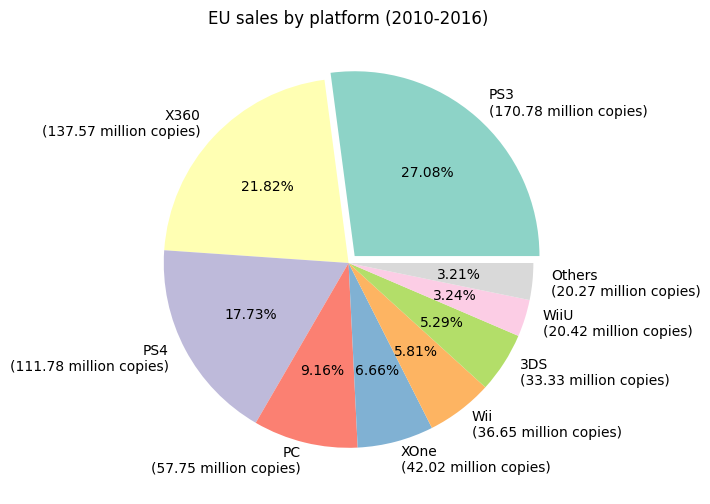

In [77]:
explode = [0.] * data_eu_sales_by_platform.size
explode[0] = 0.05

plt.figure(figsize=figure_size)
plt.pie(data_eu_sales_by_platform,
        labels=label_format(data_eu_sales_by_platform.index.tolist(), data_eu_sales_by_platform),
        explode=explode, colors=plt.cm.Set3.colors, autopct='%.2f%%')
plt.title(f'EU sales by platform ({year_range})')
plt.show()

> Scoped to 2004-2016

In [78]:
# Scopes to 2004-2016
data_2004_2016 = data_clean[data_clean['Year_of_Release'] >= 2004]
data_2004_2016.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000
mean,2008.883901,0.394064,0.241102,0.061290,0.090265,0.786922,69.777737,31.215087,7.044931,203.157498
std,3.381784,1.026840,0.736859,0.290226,0.295884,2.093971,13.703815,20.245010,1.433524,644.849768
min,2004.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2006.000000,0.060000,0.010000,0.000000,0.010000,0.110000,62.000000,15.000000,6.300000,13.000000
50%,2008.000000,0.150000,0.050000,0.000000,0.020000,0.290000,72.000000,28.000000,7.400000,32.000000
75%,2011.000000,0.385000,0.210000,0.020000,0.080000,0.750000,80.000000,43.000000,8.100000,110.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.500000,10665.000000


In [79]:
data_eu_sales_by_platform = data_2004_2016.groupby('Platform')['EU_Sales'].sum()
data_count_by_platform = data_2004_2016.groupby('Platform')['Name'].count()
print(data_eu_sales_by_platform)
print(data_count_by_platform)

Platform
3DS      33.33
DS       95.30
GBA       9.91
GC       10.01
PC       94.60
PS2      97.79
PS3     273.50
PS4     111.78
PSP      49.13
PSV       8.77
Wii     204.13
WiiU     20.42
X360    234.33
XB       25.37
XOne     42.02
Name: EU_Sales, dtype: float64
Platform
3DS     155
DS      464
GBA      88
GC      136
PC      581
PS2     607
PS3     769
PS4     239
PSP     390
PSV     118
Wii     479
WiiU     89
X360    858
XB      303
XOne    159
Name: Name, dtype: int64


In [80]:
chosen_platforms = ('PS3', 'X360', 'Wii', 'PS4', 'PC', 'XOne', 'WiiU')

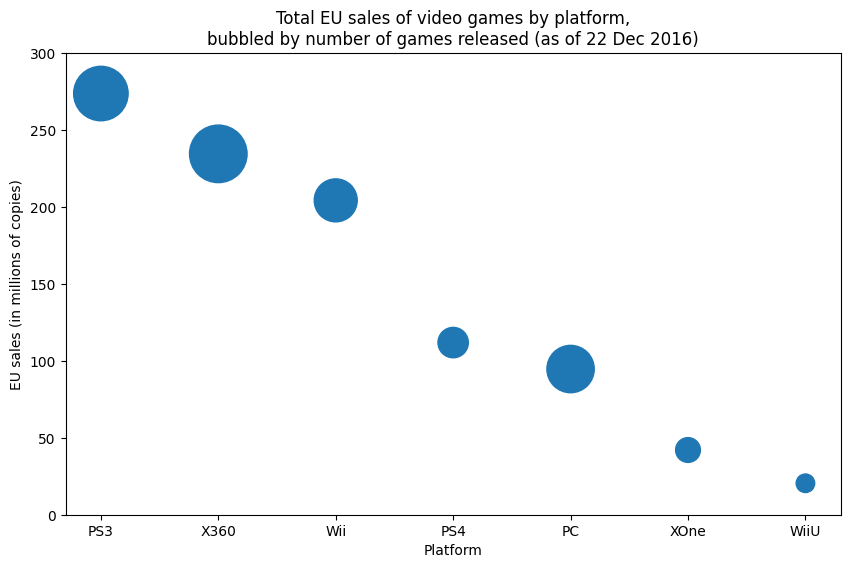

In [81]:
plt.figure(figsize=figure_size)
plt.scatter(chosen_platforms, [data_eu_sales_by_platform[p] for p in chosen_platforms],
            s=[data_count_by_platform[p] * 2 for p in chosen_platforms])

plt.xlabel('Platform')
plt.ylim(0, 300)
plt.ylabel('EU sales (in millions of copies)')
plt.title('Total EU sales of video games by platform,\nbubbled by number of games released (as of 22 Dec 2016)')
plt.show()

> Scoped to "Shooter" genre

In [82]:
data_platform_collapsed_shooter = data_2004_2016[data_2004_2016['Genre'] == 'Shooter']
data_eu_sales_by_platform_shooter = data_platform_collapsed_shooter.groupby('Platform')['EU_Sales'].sum()
data_count_by_platform_shooter = data_platform_collapsed_shooter.groupby('Platform')['Name'].count()
print(data_eu_sales_by_platform_shooter)
print(data_count_by_platform_shooter)

Platform
3DS      0.27
DS       0.43
GBA      0.05
GC       1.05
PC      18.10
PS2     11.76
PS3     65.43
PS4     28.71
PSP      5.12
PSV      1.49
Wii      4.49
WiiU     1.57
X360    69.98
XB       7.70
XOne    13.98
Name: EU_Sales, dtype: float64
Platform
3DS       2
DS       27
GBA       3
GC       17
PC      120
PS2      64
PS3     121
PS4      33
PSP      30
PSV       5
Wii      29
WiiU      5
X360    153
XB       65
XOne     30
Name: Name, dtype: int64


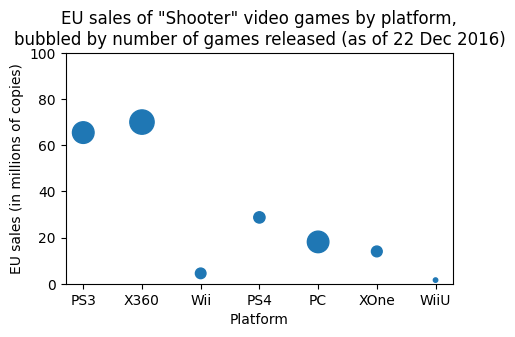

In [83]:
plt.figure(figsize=[s * 0.5 for s in figure_size])
plt.scatter(chosen_platforms, [data_eu_sales_by_platform_shooter[p] for p in chosen_platforms],
            s=[data_count_by_platform_shooter[p] * 2 for p in chosen_platforms])

plt.xlabel('Platform')
plt.ylim(0, 100)
plt.ylabel('EU sales (in millions of copies)')
plt.title('EU sales of "Shooter" video games by platform,\nbubbled by number of games released (as of 22 Dec 2016)')
plt.show()

### User scores by platform

> Scoped to year range of 2004 to 2016 and "Shooter" genre

In [84]:
# Scopes to "Shooter" genre
data_shooter_user = data_2004_2016[data_2004_2016['Genre'] == 'Shooter'][['Platform', 'User_Score', 'User_Count']]
data_shooter_user.head()

,Platform,User_Score,User_Count
29,X360,3.4,8713.0
32,X360,6.3,1454.0
34,PS3,5.3,922.0
35,X360,4.8,2256.0
36,X360,6.3,2698.0


In [85]:
data_shooter_user_stats = data_shooter_user.groupby('Platform')[['User_Score', 'User_Count']].describe()
data_shooter_user_stats

User_Score                                                    \
              count      mean       std  min    25%   50%    75%  max   
Platform                                                                
3DS             2.0  7.950000  0.353553  7.7  7.825  7.95  8.075  8.2   
DS             27.0  7.222222  0.931225  5.0  6.900  7.40  7.900  8.4   
GBA             3.0  8.000000  0.700000  7.2  7.750  8.30  8.400  8.5   
GC             17.0  7.200000  2.284185  1.4  6.700  8.10  8.500  9.1   
PC            120.0  6.853333  1.617391  2.5  5.900  7.40  8.000  9.3   
PS2            64.0  7.656250  1.307958  3.4  7.000  8.10  8.525  9.2   
PS3           121.0  6.590909  1.506597  1.7  6.000  6.90  7.700  8.7   
PS4            33.0  6.651515  1.433336  3.4  6.100  6.90  7.800  8.5   
PSP            30.0  7.686667  0.875227  6.0  7.125  7.80  8.300  9.1   
PSV             5.0  7.640000  0.770065  6.8  7.400  7.50  7.600  8.9   
Wii            29.0  6.886207  1.821837  1.8  5.800  7.60  8.200  9.3   
WiiU            5.0  6.400000  1.937782  3.4  5.800  6.90  7.400  8.5   
X360          153.0  6.781046  1.459215  1.2  6.100  7.10  7.800  8.9   
XB             65.0  7.446154  1.401013  2.8  7.000  7.90  8.500  9.2   
XOne           30.0  6.540000  1.345132  3.1  5.525  6.75  7.650  8.3   

         User_Count                                                           \
              count         mean          std    min     25%    50%      75%   
Platform                                                                       
3DS             2.0   124.500000   150.613744   18.0   71.25  124.5   177.75   
DS             27.0    27.259259    35.240484    4.0    8.50   19.0    29.00   
GBA             3.0    12.333333     2.081666   10.0   11.50   13.0    13.50   
GC             17.0    34.117647    67.568375    5.0    8.00   13.0    15.00   
PC            120.0  1196.808333  1735.290324   16.0  223.75  557.0  1268.50   
PS2            64.0    44.203125    54.170858    5.0   12.75   24.5    51.00   
PS3           121.0   323.173554   623.288011   10.0   41.00   92.0   294.00   
PS4            33.0  1133.454545  1532.588845   13.0  178.00  795.0  1443.00   
PSP            30.0    38.766667    29.497730    4.0   14.75   30.5    47.00   
PSV             5.0   411.000000   238.858745  169.0  245.00  358.0   513.00   
Wii            29.0    89.655172   128.840787    5.0   11.00   31.0    87.00   
WiiU            5.0   472.000000   459.510609   30.0  228.00  256.0   662.00   
X360          153.0   467.209150   960.408998    4.0   59.00  128.0   404.00   
XB             65.0    44.015385   150.156740    4.0    9.00   16.0    29.00   
XOne           30.0   614.400000   652.776489   34.0  254.25  395.0   692.00   

                  
             max  
Platform          
3DS        231.0  
DS         188.0  
GBA         14.0  
GC         279.0  
PC        9851.0  
PS2        268.0  
PS3       5234.0  
PS4       7064.0  
PSP        118.0  
PSV        770.0  
Wii        491.0  
WiiU      1184.0  
X360      8713.0  
XB        1218.0  
XOne      2658.0

**Chosen platforms of focus:**
* XOne
* X360
* WiiU
* Wii
* PS4
* PS3
* PC

In [86]:
chosen_platforms = ('XOne', 'X360', 'WiiU', 'Wii', 'PS4', 'PS3', 'PC')

In [87]:
data_shooter_user_stats.loc[chosen_platforms, 'User_Score']

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
XOne,30.0,6.540000,1.345132,3.1,5.525,6.75,7.65,8.3
X360,153.0,6.781046,1.459215,1.2,6.100,7.10,7.80,8.9
WiiU,5.0,6.400000,1.937782,3.4,5.800,6.90,7.40,8.5
Wii,29.0,6.886207,1.821837,1.8,5.800,7.60,8.20,9.3
PS4,33.0,6.651515,1.433336,3.4,6.100,6.90,7.80,8.5
PS3,121.0,6.590909,1.506597,1.7,6.000,6.90,7.70,8.7
PC,120.0,6.853333,1.617391,2.5,5.900,7.40,8.00,9.3


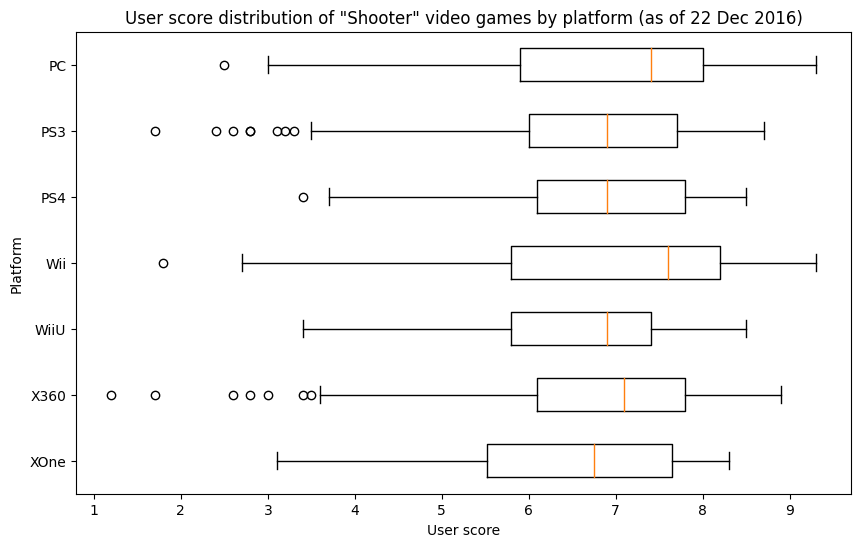

In [88]:
plt.figure(figsize=figure_size)
plt.boxplot([data_shooter_user[data_shooter_user['Platform'] == p]['User_Score'] for p in chosen_platforms],
            labels=chosen_platforms, vert=False)
plt.xlabel('User score')
plt.ylabel('Platform')
plt.title('User score distribution of "Shooter" video games by platform (as of 22 Dec 2016)')
plt.show()

In [89]:
heatmap_data = pd.pivot_table(data_2004_2016, values='EU_Sales', columns=['Platform'], index=['Genre'], aggfunc=np.sum)
heatmap_data = heatmap_data.loc[chosen_genres, chosen_platforms]
heatmap_data

Platform,XOne,X360,WiiU,Wii,PS4,PS3,PC
Genre,,,,,,,
Shooter,13.98,69.98,1.57,4.49,28.71,65.43,18.10
Role-Playing,2.66,17.32,0.42,1.87,7.99,16.81,22.26
Sports,8.65,25.74,0.68,73.08,25.79,30.62,5.42


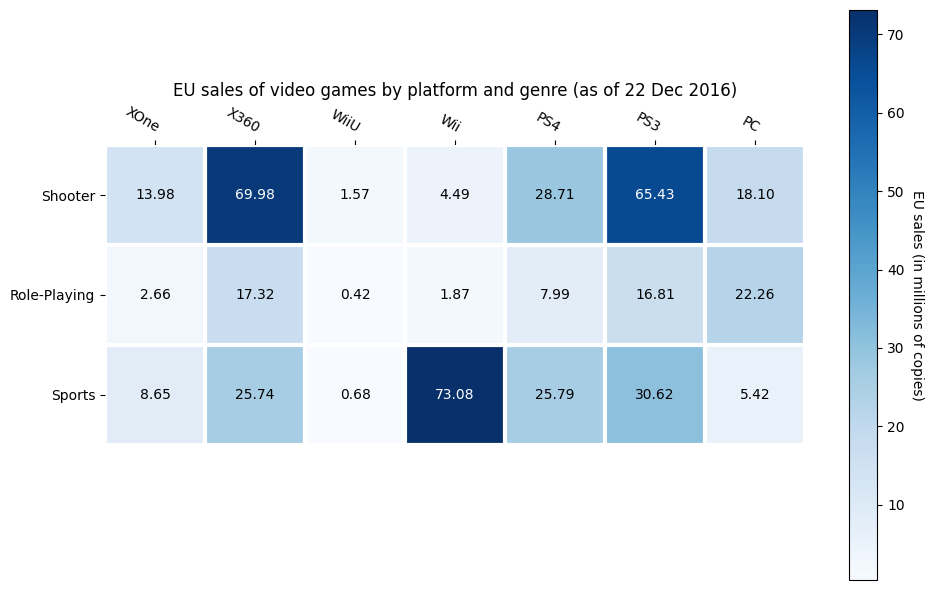

In [90]:
fig, ax = plt.subplots(figsize=figure_size)
im, cbar = heatmap(heatmap_data, chosen_genres, chosen_platforms,
                   ax=ax, cmap='Blues', cbarlabel='EU sales (in millions of copies)')
texts = annotate_heatmap(im, valfmt='{x:.2f}')

fig.tight_layout()
plt.title('EU sales of video games by platform and genre (as of 22 Dec 2016)')
plt.show()